# Notebook for initial data analysis

In [25]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import os
from pathlib import Path

In [ ]:
# Read dataset
# Info and describe
data = pd.read_csv(f'/content/heart.csv')
data.head()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


It seems like there are no null values in the dataframe. Let's double check.

In [ ]:
data.isna().any()

No null values - which means no cleaning is required.

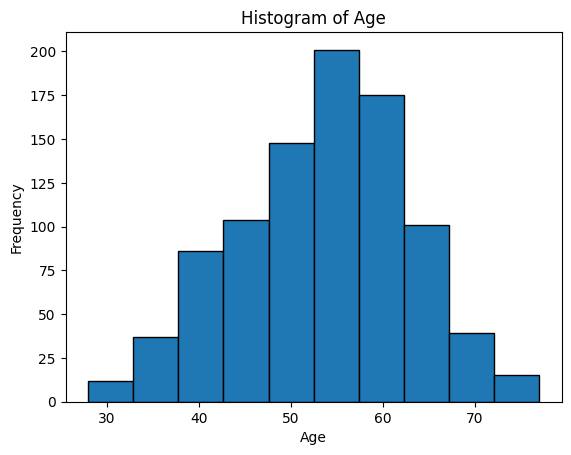

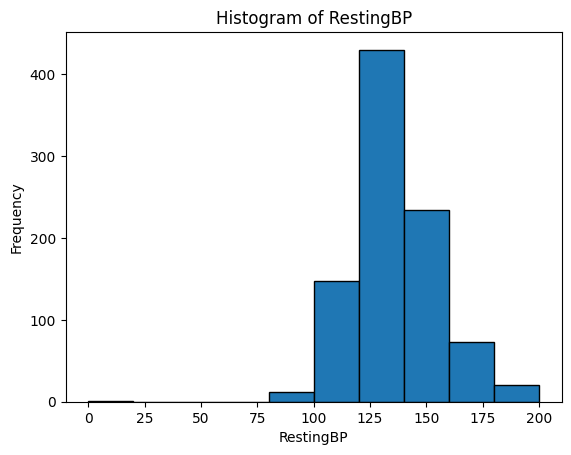

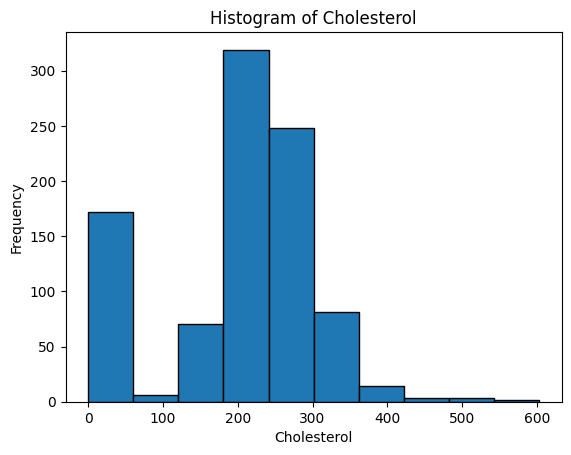

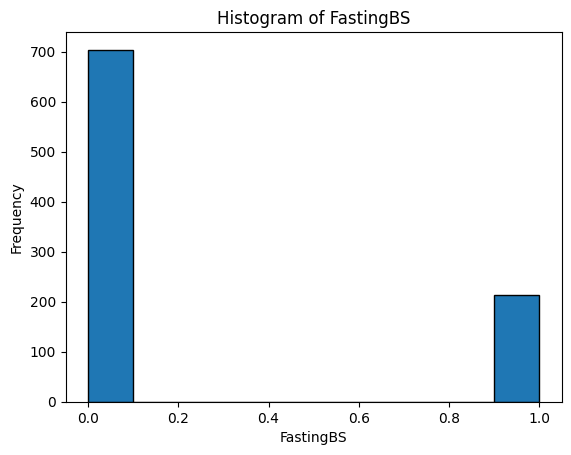

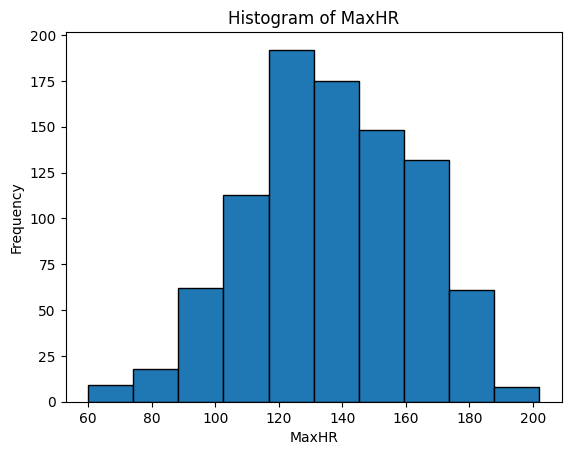

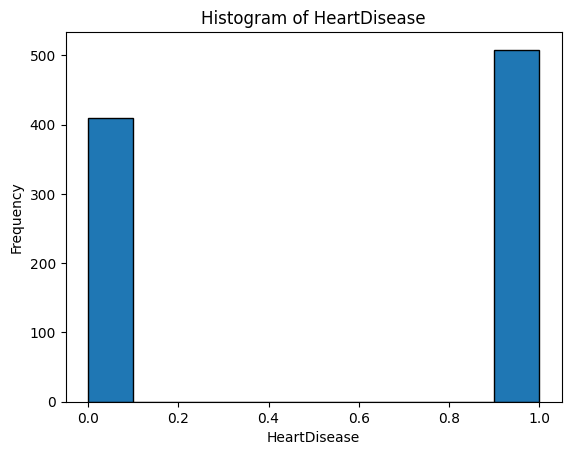

In [43]:
# histogram for numeric data

numerical_columns = data.select_dtypes(include=['int64']).columns

# loop to create histogram for the selected columns
for col in numerical_columns:
  plt.figure()
  plt.hist(data[col], bins=10, edgecolor='black')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#selecting columns with non-integer (or object) for extracting countplots
categorical_columns = data.select_dtypes(include=['object']).columns

# loop to create countplots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

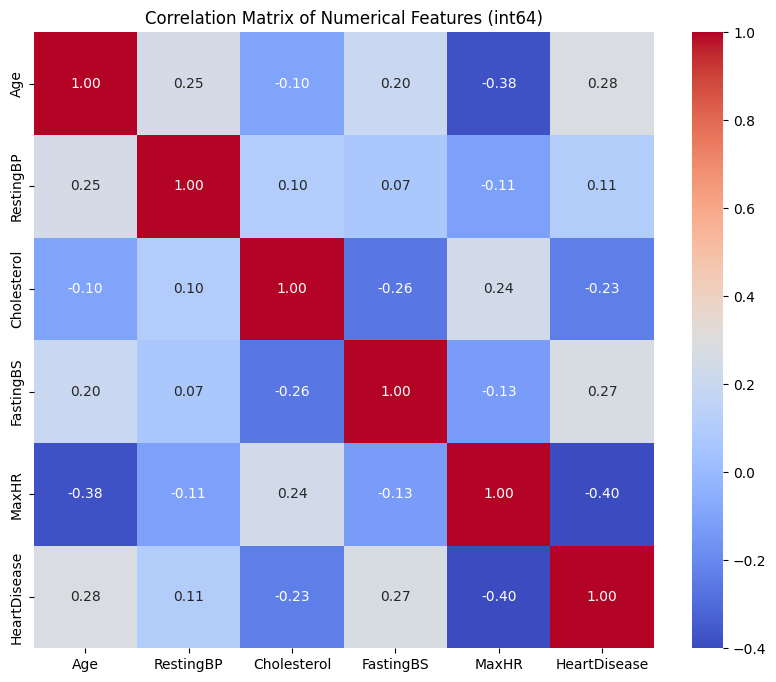

In [45]:
# store correlation matrix in a variable
correlation_matrix = data[numerical_columns].corr()

# extracting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (int64)')
plt.show()